In [23]:
# Import dependencies.
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [24]:
engine = create_engine('sqlite:///onlinefoods.sqlite')

In [25]:
# Create an inspector
inspector = inspect(engine)

# Get the table names
table_names = inspector.get_table_names()

print(table_names)

['onlinefoods']


In [26]:
# Get the column names of a specific table
columns = inspector.get_columns('onlinefoods')
print("Column Names:")
for column in columns:
    print(column['name'])

Column Names:
id
age
gender
marital_status
occupation
monthly_income
educational_qualifications
family_size
latitude
longitude
pin_code


In [27]:
query = "SELECT * FROM onlinefoods"

df = pd.read_sql(text(query), con=engine)
df.head()

,id,age,gender,marital_status,occupation,monthly_income,educational_qualifications,family_size,latitude,longitude,pin_code
0,1,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001
1,2,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009
2,3,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017
3,4,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019
4,5,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          388 non-null    int64  
 1   age                         388 non-null    int64  
 2   gender                      388 non-null    object 
 3   marital_status              388 non-null    object 
 4   occupation                  388 non-null    object 
 5   monthly_income              388 non-null    object 
 6   educational_qualifications  388 non-null    object 
 7   family_size                 388 non-null    int64  
 8   latitude                    388 non-null    float64
 9   longitude                   388 non-null    float64
 10  pin_code                    388 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 33.5+ KB


In [29]:
query = """
    SELECT
        gender,
        marital_status,
        age
    FROM
        onlinefoods
    ORDER BY
        age
"""

df_age = pd.read_sql(text(query), con=engine)
df_age.head()

,gender,marital_status,age
0,Male,Single,18
1,Male,Single,19
2,Female,Single,19
3,Male,Single,19
4,Male,Single,19


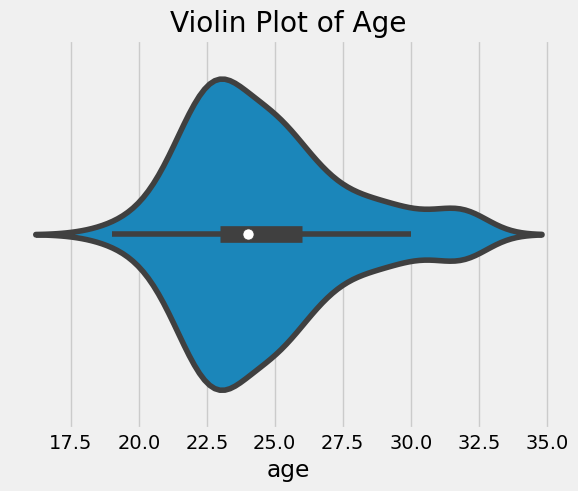

In [31]:
# create a violin chart for age
sns.violinplot(x=df_age['age'])
plt.title('Violin Plot of Age')
plt.show()

In [15]:
query = """
    SELECT
        gender,
        marital_status,
        occupation
    FROM
        onlinefoods
    ORDER BY
        occupation
"""

df_occ = pd.read_sql(text(query), con=engine)
df_occ.head()

,gender,marital_status,occupation
0,Female,Married,Employee
1,Female,Single,Employee
2,Female,Single,Employee
3,Female,Single,Employee
4,Male,Married,Employee


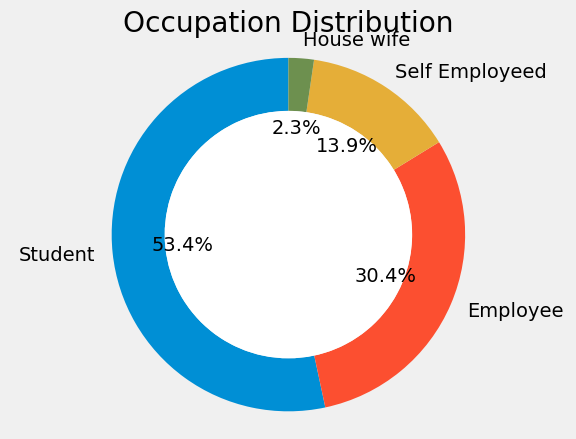

In [32]:
# Count the occurrences of each occupation
occupation_counts = df_occ['occupation'].value_counts()

# Extract occupation labels and counts
occupations = occupation_counts.index.tolist()
counts = occupation_counts.values

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(counts, labels=occupations, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

plt.title('Occupation Distribution')
plt.show()

In [16]:
query = """
    SELECT
        gender,
        marital_status,
        educational_qualifications,
        monthly_income
    FROM
        onlinefoods
    ORDER BY
        educational_qualifications
"""

df_edin = pd.read_sql(text(query), con=engine)
df_edin.head()

,gender,marital_status,educational_qualifications,monthly_income
0,Female,Single,Graduate,Below Rs.10000
1,Female,Single,Graduate,No Income
2,Male,Single,Graduate,No Income
3,Male,Single,Graduate,No Income
4,Female,Single,Graduate,No Income


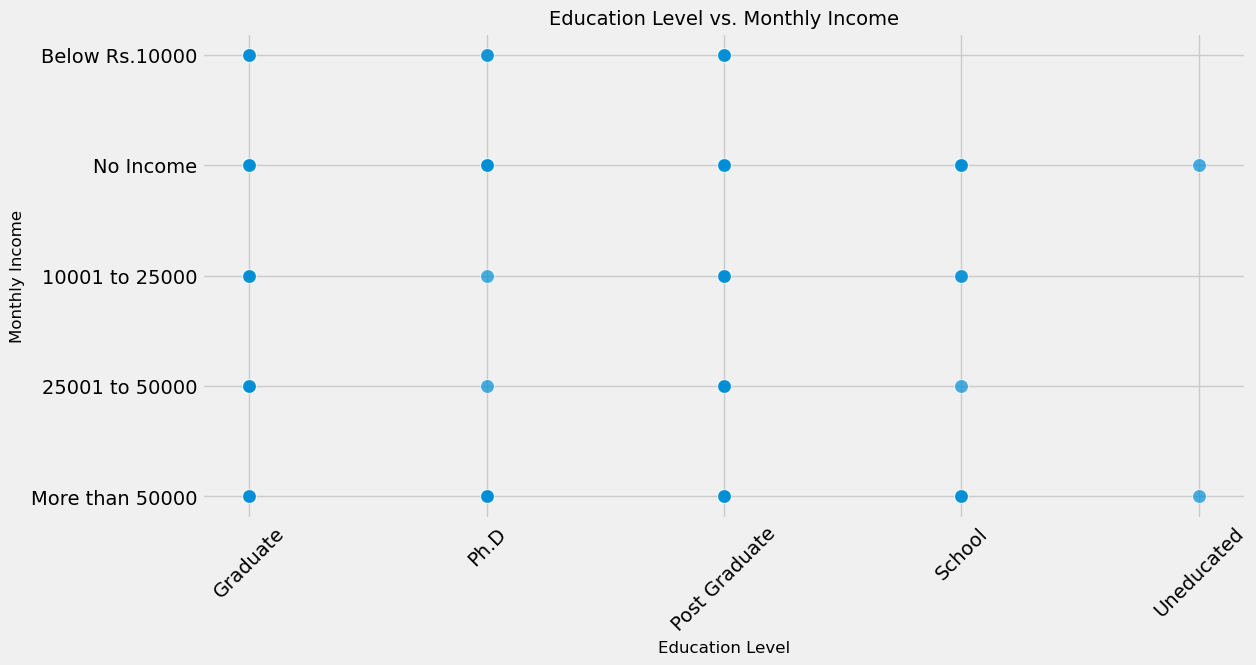

In [34]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.scatterplot(x='educational_qualifications', y='monthly_income', data=df_edin, s=100, alpha=0.7)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.title('Education Level vs. Monthly Income', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid lines

plt.show()

In [41]:
query = """
    SELECT
        gender,
        marital_status,
        educational_qualifications,
        family_size
    FROM
        onlinefoods
    ORDER BY
        family_size
"""

df_edfam = pd.read_sql(text(query), con=engine)
df_edfam.head()

,gender,marital_status,educational_qualifications,family_size
0,Female,Single,Post Graduate,1
1,Female,Single,Post Graduate,1
2,Male,Single,Post Graduate,1
3,Male,Single,Graduate,1
4,Male,Single,Ph.D,1


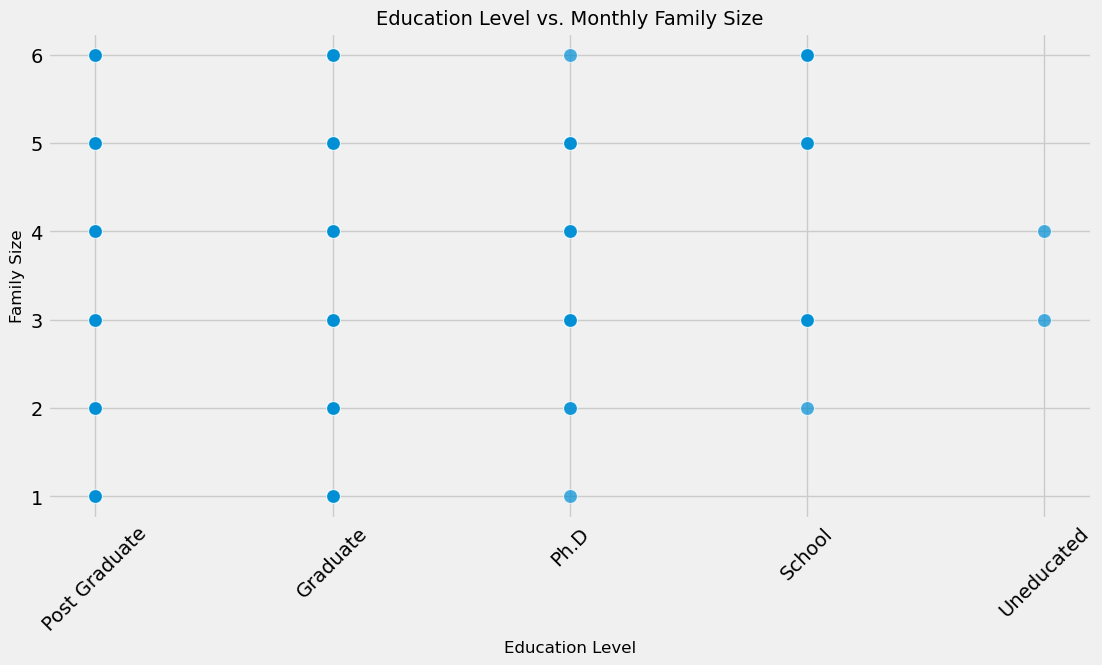

In [42]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.scatterplot(x='educational_qualifications', y='family_size', data=df_edfam, s=100, alpha=0.7)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Family Size', fontsize=12)
plt.title('Education Level vs. Monthly Family Size', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid lines

plt.show()

In [44]:
query = """
    SELECT
        gender,
        marital_status,
        monthly_income,
        family_size
    FROM
        onlinefoods
    ORDER BY
        family_size
"""

df_infam = pd.read_sql(text(query), con=engine)
df_infam.head()

,gender,marital_status,monthly_income,family_size
0,Female,Single,Below Rs.10000,1
1,Female,Single,No Income,1
2,Male,Single,25001 to 50000,1
3,Male,Single,No Income,1
4,Male,Single,10001 to 25000,1


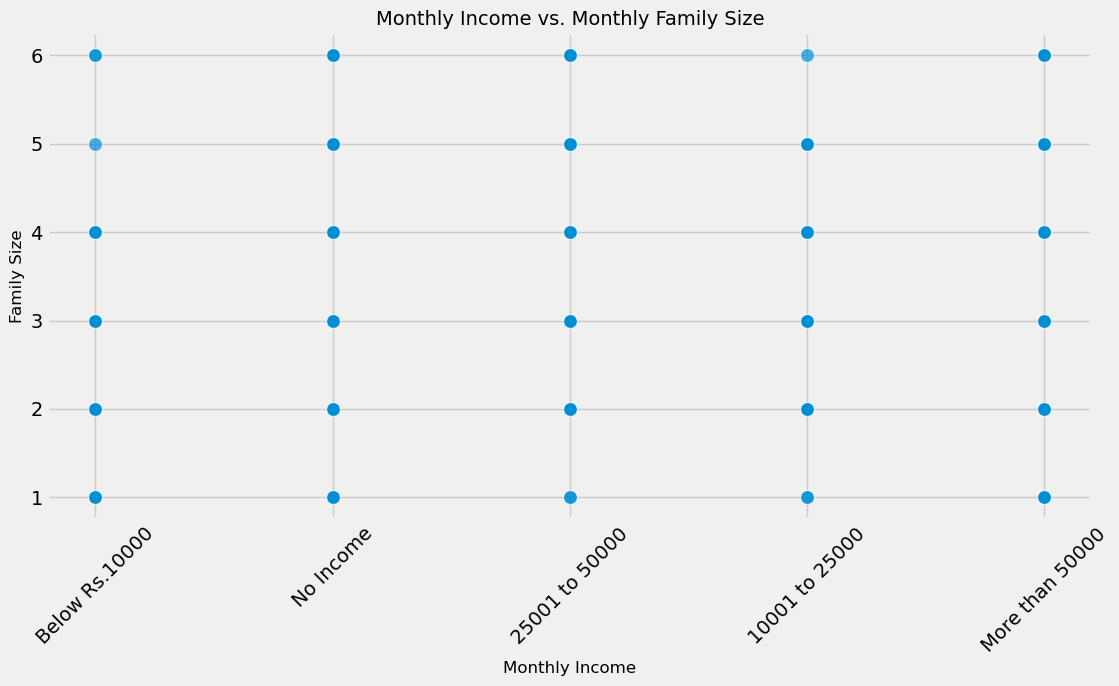

In [45]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.scatterplot(x='monthly_income', y='family_size', data=df_infam, s=100, alpha=0.7)
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Family Size', fontsize=12)
plt.title('Monthly Income vs. Monthly Family Size', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid lines

plt.show()

In [18]:
query = """
    SELECT
        gender,
        marital_status,
        educational_qualifications
    FROM
        onlinefoods
    ORDER BY
        educational_qualifications
"""

df_ed = pd.read_sql(text(query), con=engine)
df_ed.head()

,gender,marital_status,educational_qualifications
0,Female,Single,Graduate
1,Female,Single,Graduate
2,Male,Single,Graduate
3,Male,Single,Graduate
4,Female,Single,Graduate


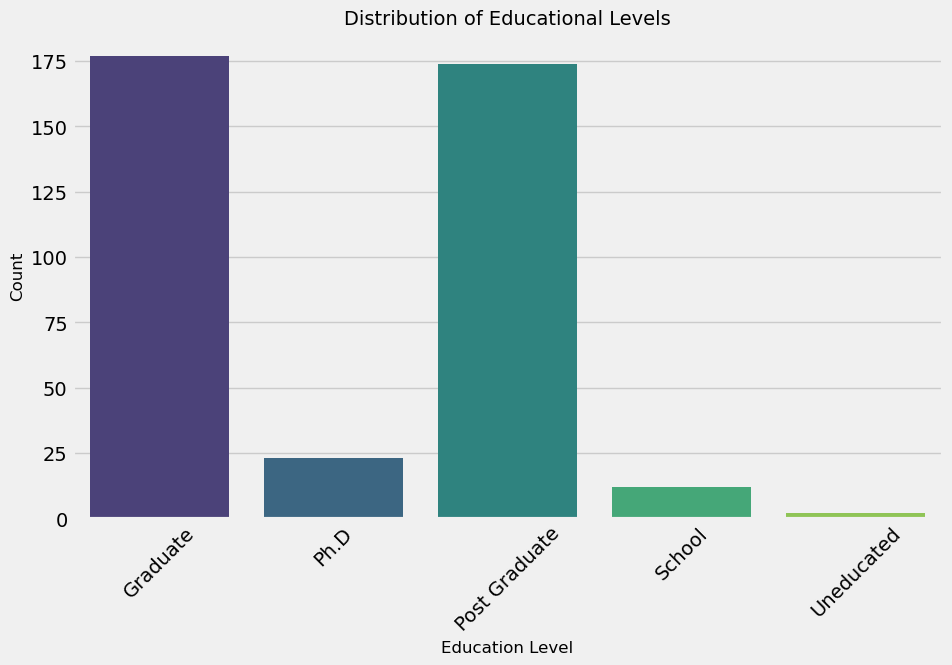

In [35]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(x='educational_qualifications', data=df_ed, palette='viridis')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Educational Levels', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()

In [19]:
query = """
    SELECT
        gender,
        marital_status,
        occupation
    FROM
        onlinefoods
    ORDER BY
        occupation
"""

df_emp = pd.read_sql(text(query), con=engine)
df_emp.head()

,gender,marital_status,occupation
0,Female,Married,Employee
1,Female,Single,Employee
2,Female,Single,Employee
3,Female,Single,Employee
4,Male,Married,Employee


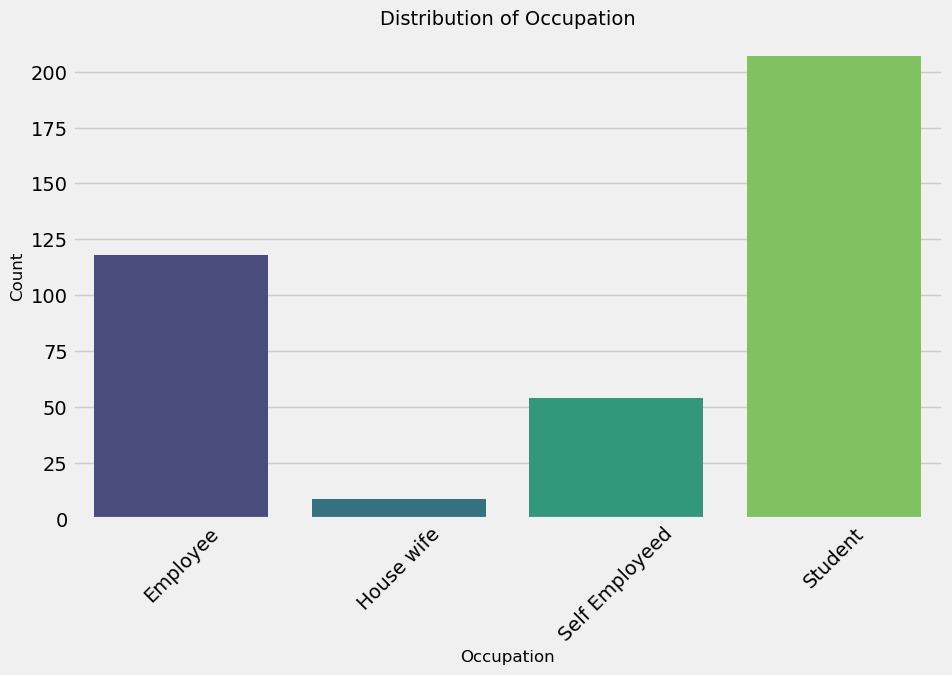

In [37]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(x='occupation', data=df_emp, palette='viridis')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Occupation', fontsize=14)

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()